## Análisis para determinar cuál es el jugador mas importante de la NBA

Utilizaríamos el siguiente análisis como baseline, es un análisis similar que lo aplican a football.
[Referencia](https://towardsdatascience.com/who-is-the-premier-leagues-most-important-player-4f184f7b39e4)

La librería que recomienda el articulo de referencia para hacer gráficas para pagerank, es NetworkX. [Tutorial](https://networkx.github.io/documentation/stable/tutorial.html)

### Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Importamos la información

El dataset que utilizaremos esta este análisis lo obtuvimos de [kaggle](https://www.kaggle.com/schmadam97/nba-playbyplay-data-20182019/data) y tiene la siguiente estructura.
+ GameType - Regular or Playoff
+ Location - Stadium Name
+ Date - Date of Game
+ Time - Time of Game
+ WinningTeam - Team that Won the Game

Hay mas variables que su nombre las explica.

Por ahora solo importaremos la información de 2016 - 2017

In [2]:
#filename = './../../Datos/NBA-PBP_2016-2017.csv'
filename = '/Users/diegovillalizarraga/Maestria Ciencia de Datos ITAM/2do Semestre/Metodos Analiticos/Proyecto Final/NBA-PBP_2016-2017.csv'
data = pd.read_csv(filename)
pd.set_option('display.max_columns', 500)

## EDA

Veamos los primeros 5 registros para ver que forma tiene la información.

In [3]:
data.head()

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,AwayScore,HomeTeam,HomePlay,HomeScore,Shooter,ShotType,ShotOutcome,ShotDist,Assister,Blocker,FoulType,Fouler,Fouled,Rebounder,ReboundType,ViolationPlayer,ViolationType,TimeoutTeam,FreeThrowShooter,FreeThrowOutcome,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
0,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,720,NYK,Jump ball: J. Noah vs. T. Thompson (D. Rose ga...,0,CLE,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J. Noah - NYK,T. Thompson - CLE,D. Rose
1,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,700,NYK,D. Rose makes 2-pt layup from 1 ft (assist by ...,2,CLE,NaN,0,D. Rose - NYK,2-pt layup,make,1.0,J. Noah - NYK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,686,NYK,NaN,2,CLE,K. Love misses 2-pt hook shot from 4 ft,0,K. Love - CLE,2-pt hook shot,miss,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,683,NYK,Defensive rebound by J. Noah,2,CLE,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J. Noah - NYK,defensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,676,NYK,C. Anthony misses 2-pt jump shot from 20 ft,2,CLE,NaN,0,C. Anthony - NYK,2-pt jump shot,miss,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ahora los últimos 5.

In [4]:
data.tail()

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,AwayScore,HomeTeam,HomePlay,HomeScore,Shooter,ShotType,ShotOutcome,ShotDist,Assister,Blocker,FoulType,Fouler,Fouled,Rebounder,ReboundType,ViolationPlayer,ViolationType,TimeoutTeam,FreeThrowShooter,FreeThrowOutcome,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
596640,/boxscores/201704090LAL.html,regular,STAPLES Center Los Angeles California,April 9 2017,9:30 PM,LAL,4,5,MIN,NaN,109,LAL,M. World Peace misses 3-pt jump shot from 23 ft,107,M. World Peace - LAL,3-pt jump shot,miss,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596641,/boxscores/201704090LAL.html,regular,STAPLES Center Los Angeles California,April 9 2017,9:30 PM,LAL,4,3,MIN,NaN,109,LAL,Offensive rebound by J. Randle,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J. Randle - LAL,offensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596642,/boxscores/201704090LAL.html,regular,STAPLES Center Los Angeles California,April 9 2017,9:30 PM,LAL,4,2,MIN,NaN,109,LAL,D. Russell makes 3-pt jump shot from 25 ft (as...,110,D. Russell - LAL,3-pt jump shot,make,25.0,J. Randle - LAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596643,/boxscores/201704090LAL.html,regular,STAPLES Center Los Angeles California,April 9 2017,9:30 PM,LAL,4,0,MIN,End of 4th quarter,109,LAL,NaN,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596644,/boxscores/201704090LAL.html,regular,STAPLES Center Los Angeles California,April 9 2017,9:30 PM,LAL,4,0,MIN,End of Game,109,LAL,NaN,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ahora veamos cuantas entradas tiene el dataset a total y para cada una de las columnas.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596645 entries, 0 to 596644
Data columns (total 40 columns):
URL                   596645 non-null object
GameType              596645 non-null object
Location              596645 non-null object
Date                  596645 non-null object
Time                  596645 non-null object
WinningTeam           596645 non-null object
Quarter               596645 non-null int64
SecLeft               596645 non-null int64
AwayTeam              596645 non-null object
AwayPlay              302493 non-null object
AwayScore             596645 non-null int64
HomeTeam              596645 non-null object
HomePlay              294152 non-null object
HomeScore             596645 non-null int64
Shooter               223288 non-null object
ShotType              223288 non-null object
ShotOutcome           223288 non-null object
ShotDist              223288 non-null float64
Assister              59138 non-null object
Blocker               12485 non-null o

Veamos la primera observación del dataset completa.

In [6]:
#data.columns.get_loc('Date')    --   Codigo util para obtener el indice de la columna dando el nombre
data.iloc[0]

URL                                        /boxscores/201610250CLE.html
GameType                                                        regular
Location                             Quicken Loans Arena Cleveland Ohio
Date                                                    October 25 2016
Time                                                            7:30 PM
WinningTeam                                                         CLE
Quarter                                                               1
SecLeft                                                             720
AwayTeam                                                            NYK
AwayPlay              Jump ball: J. Noah vs. T. Thompson (D. Rose ga...
AwayScore                                                             0
HomeTeam                                                            CLE
HomePlay                                                            NaN
HomeScore                                                       

Veamos alguna observación (jugada) en la que se obtuvieron puntos para ver como lo reporta el dataset. 

In [7]:
pd.unique(data['ShotOutcome'])

array([nan, 'make', 'miss'], dtype=object)

In [8]:
shotoutcome_make = data[data['ShotOutcome'] == 'make']
shotoutcome_make.iloc[0]

URL                                        /boxscores/201610250CLE.html
GameType                                                        regular
Location                             Quicken Loans Arena Cleveland Ohio
Date                                                    October 25 2016
Time                                                            7:30 PM
WinningTeam                                                         CLE
Quarter                                                               1
SecLeft                                                             700
AwayTeam                                                            NYK
AwayPlay              D. Rose makes 2-pt layup from 1 ft (assist by ...
AwayScore                                                             2
HomeTeam                                                            CLE
HomePlay                                                            NaN
HomeScore                                                       

In [9]:
shotoutcome_miss = data[data['ShotOutcome'] == 'miss']
shotoutcome_miss.iloc[1]

URL                                  /boxscores/201610250CLE.html
GameType                                                  regular
Location                       Quicken Loans Arena Cleveland Ohio
Date                                              October 25 2016
Time                                                      7:30 PM
WinningTeam                                                   CLE
Quarter                                                         1
SecLeft                                                       676
AwayTeam                                                      NYK
AwayPlay              C. Anthony misses 2-pt jump shot from 20 ft
AwayScore                                                       2
HomeTeam                                                      CLE
HomePlay                                                      NaN
HomeScore                                                       0
Shooter                                          C. Anthony - NYK
ShotType  

Veamos los valores únicos de las columnas.

In [10]:
pd.unique(data['Quarter'])

array([1, 2, 3, 4, 5, 6, 7, 8])

In [11]:
pd.unique(data['ShotType'])

array([nan, '2-pt layup', '2-pt hook shot', '2-pt jump shot',
       '3-pt jump shot', '2-pt dunk', '3-pt hook shot', '3-pt layup'],
      dtype=object)

In [12]:
pd.unique(data['Blocker'])

array([nan, 'K. Porziis - NYK', 'D. Rose - NYK', "K. O'Quinn - NYK",
       'C. Frye - CLE', 'I. Shumpert - CLE', 'C. Lee - NYK',
       'L. James - CLE', 'D. Liggins - CLE', 'C. Andersen - CLE',
       'R. Hood - UTA', 'G. Hill - UTA', 'E. Davis - POR',
       'J. Withey - UTA', 'R. Gobert - UTA', 'E. Turner - POR',
       'N. Vonleh - POR', 'K. Durant - GSW', 'D. Dedmon - SAS',
       'J. Simmons - SAS', 'D. West - GSW', 'D. Green - GSW',
       'I. Clark - GSW', 'P. McCaw - GSW', 'A. Bogut - DAL',
       'J. Anderson - DAL', 'M. Turner - IND', 'J. Barea - DAL',
       'D. Powell - DAL', 'S. Curry - DAL', 'A. Jefferson - IND',
       'D. Williams - DAL', 'D. Nowitzki - DAL', 'L. Allen - IND',
       'H. Whiteside - MIA', 'E. Payton - ORL', 'J. Winslow - MIA',
       'A. Gordon - ORL', 'S. Ibaka - ORL', 'W. Reed - MIA',
       'A. Horford - BOS', 'J. Crowder - BOS', 'J. Brown - BOS',
       'T. Zeller - BOS', 'J. Lin - BRK', 'J. Harris - BRK',
       'D. Gallinari - DEN', 'A. Davis - 

In [13]:
pd.unique(data['GameType'])

array(['regular', 'playoff'], dtype=object)

In [14]:
pd.unique(data['FoulType'])

array([nan, 'offensive', 'shooting', 'personal', 'def 3 sec tech',
       'loose ball', 'offensive charge', 'shooting block',
       'personal block', 'personal take', 'technical', 'flagrant',
       'inbound', 'clear path', 'away from play'], dtype=object)

In [15]:
pd.unique(data['ReboundType'])

array([nan, 'defensive', 'offensive'], dtype=object)

In [16]:
pd.unique(data['ViolationType'])

array([nan, 'kicked ball', 'jump ball', 'def goaltending', 'lane',
       'delay of game', 'double lane'], dtype=object)

*Analisis - play offs 2018 - Equipo cavaliers, determinar MVP*

*Buscar trabajos similares de referencia.*

## Feature engineering

### Datos para gráfica

Seleccionamos las columnas que nos interesan (`Shooter`y `Assister`), contando las apariciones de cada par:

In [17]:
df_sa = data.groupby(["Shooter","Assister", ]).size().reset_index().rename(columns={0:'count'})

Separamos en distintas columnas los nombres del shooter y el assister del equipo al que pertenecen:

In [18]:
df_sa[['shooter','sh_team']]= df_sa.Shooter.str.split(" - ",expand=True)
df_sa[['assister','as_team']]= df_sa.Assister.str.split(" - ",expand=True)

Y verificamos que las columnas de equipo resultantes sean iguales

In [19]:
comparacion = np.where(df_sa["sh_team"] == df_sa["as_team"], True, False)

In [20]:
comparacion

array([ True,  True,  True, ...,  True,  True,  True])

In [21]:
np.unique(comparacion)

array([ True])

Con lo que podemos conservar sólo una de ellas:

In [22]:
df_sa['team'] = df_sa['sh_team']

In [23]:
df_sa

,Shooter,Assister,count,shooter,sh_team,assister,as_team,team
0,. Abrines - OKC,A. Roberson - OKC,6,. Abrines,OKC,A. Roberson,OKC,OKC
1,. Abrines - OKC,C. Payne - OKC,3,. Abrines,OKC,C. Payne,OKC,OKC
2,. Abrines - OKC,D. McDermott - OKC,3,. Abrines,OKC,D. McDermott,OKC,OKC
3,. Abrines - OKC,D. Sabonis - OKC,8,. Abrines,OKC,D. Sabonis,OKC,OKC
4,. Abrines - OKC,E. Kanter - OKC,14,. Abrines,OKC,E. Kanter,OKC,OKC
5,. Abrines - OKC,J. Grant - OKC,7,. Abrines,OKC,J. Grant,OKC,OKC
6,. Abrines - OKC,J. Lauvergne - OKC,5,. Abrines,OKC,J. Lauvergne,OKC,OKC
7,. Abrines - OKC,K. Singler - OKC,2,. Abrines,OKC,K. Singler,OKC,OKC
8,. Abrines - OKC,N. Cole - OKC,2,. Abrines,OKC,N. Cole,OKC,OKC
9,. Abrines - OKC,R. Westbrook - OKC,45,. Abrines,OKC,R. Westbrook,OKC,OKC


Seleccionamos sólo las columnas a utilizar, esto es `shooter`, `assister`, `team` y `count`:

In [24]:
df_graph = df_sa[['shooter','assister','team','count']]
# df_graph.columns = [['shooter','assister','team','weight']]

In [25]:
df_graph

,shooter,assister,team,count
0,. Abrines,A. Roberson,OKC,6
1,. Abrines,C. Payne,OKC,3
2,. Abrines,D. McDermott,OKC,3
3,. Abrines,D. Sabonis,OKC,8
4,. Abrines,E. Kanter,OKC,14
5,. Abrines,J. Grant,OKC,7
6,. Abrines,J. Lauvergne,OKC,5
7,. Abrines,K. Singler,OKC,2
8,. Abrines,N. Cole,OKC,2
9,. Abrines,R. Westbrook,OKC,45


Exploremos brevemente el data frame resultante.

In [26]:
df_graph.shape

(5527, 4)

Resumen estadístico

In [27]:
df_graph.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
count,5527.0,10.699837,18.247995,1.0,2.0,5.0,12.0,278.0


Tipo de datos:

In [28]:
df_graph.dtypes

shooter     object
assister    object
team        object
count        int64
dtype: object

Comprobamos que no tenemos NA:

In [29]:
x = df_graph.isnull().sum()
x

shooter     0
assister    0
team        0
count       0
dtype: int64

Número de observaciones únicas por variable:

In [30]:
df_graph.nunique()

shooter     457
assister    458
team         30
count       123
dtype: int64

In [31]:
df_graph['team'].unique()

array(['OKC', 'NOP', 'SAC', 'POR', 'LAC', 'DET', 'BRK', 'DAL', 'BOS',
       'IND', 'ORL', 'UTA', 'DEN', 'MEM', 'GSW', 'PHO', 'CHI', 'WAS',
       'MIN', 'PHI', 'HOU', 'TOR', 'SAS', 'LAL', 'NYK', 'CHO', 'CLE',
       'ATL', 'MIA', 'MIL'], dtype=object)

In [32]:
df_graph

,shooter,assister,team,count
0,. Abrines,A. Roberson,OKC,6
1,. Abrines,C. Payne,OKC,3
2,. Abrines,D. McDermott,OKC,3
3,. Abrines,D. Sabonis,OKC,8
4,. Abrines,E. Kanter,OKC,14
5,. Abrines,J. Grant,OKC,7
6,. Abrines,J. Lauvergne,OKC,5
7,. Abrines,K. Singler,OKC,2
8,. Abrines,N. Cole,OKC,2
9,. Abrines,R. Westbrook,OKC,45


## Cleveland Cavaliers
Filtramos los datos para Cleveland Cavaliers, que es el equipo que nos interesa analizar:


In [33]:
df_CLE = df_graph[df_graph['team'] == 'CLE']

In [34]:
df_CLE

,shooter,assister,team,count
692,C. Andersen,D. Liggins,CLE,1
693,C. Andersen,K. Felder,CLE,2
694,C. Andersen,M. Dunleavy,CLE,1
695,C. Andersen,R. Jefferson,CLE,1
763,C. Frye,D. Liggins,CLE,4
764,C. Frye,D. Williams,CLE,28
765,C. Frye,I. Shumpert,CLE,16
766,C. Frye,J. Jones,CLE,2
767,C. Frye,J. McRae,CLE,1
768,C. Frye,J. Smith,CLE,6


In [35]:
df_CLE.nunique()

shooter     18
assister    18
team         1
count       36
dtype: int64

In [36]:
shooters = df_CLE.shooter.unique()
shooters.sort()
shooters

array(['C. Andersen', 'C. Frye', 'D. Jones', 'D. Liggins', 'D. Williams',
       'E. Tavares', 'I. Shumpert', 'J. Jones', 'J. McRae', 'J. Smith',
       'K. Felder', 'K. Irving', 'K. Korver', 'K. Love', 'L. James',
       'M. Dunleavy', 'R. Jefferson', 'T. Thompson'], dtype=object)

In [37]:
assisters = df_CLE.assister.unique()
assisters.sort()
assisters

array(['C. Andersen', 'C. Frye', 'D. Jones', 'D. Liggins', 'D. Williams',
       'E. Tavares', 'I. Shumpert', 'J. Jones', 'J. McRae', 'J. Smith',
       'K. Felder', 'K. Irving', 'K. Korver', 'K. Love', 'L. James',
       'M. Dunleavy', 'R. Jefferson', 'T. Thompson'], dtype=object)

In [38]:
players = np.union1d(shooters,assisters)

In [39]:
len(players)

18

In [40]:
if len(shooters) == len(assisters):
    (shooters==assisters).all()

In [41]:
G = nx.Graph()
# G.clear()

In [42]:
G = nx.from_pandas_edgelist(df_CLE,source='assister',target='shooter',edge_attr='count',create_using=nx.DiGraph())
#nx.DiGraph()

Observemos que la gráfica tiene un nodo por cada jugador, y una arista para cada par de ellos que interactúan en una jugada de tiro:

In [43]:
G.number_of_nodes()

18

In [44]:
G.number_of_edges()

193

### Visualización

Text(0.5, 1.0, 'Número de interacciones entre shooters y assisters')

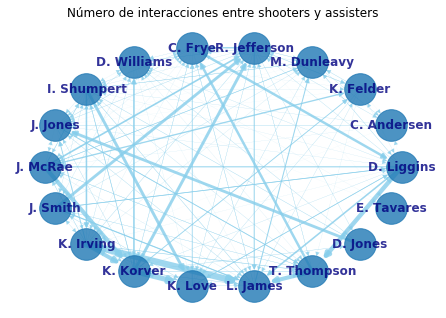

In [45]:
plt.clf() 
nx.draw_circular(G,node_size=1000,arrows=True,alpha = 0.8,
                 edge_color='skyblue', width=list(df_CLE['count']/25), edge_cmap=plt.cm.Blues, 
                 with_labels = True,font_size=12, font_color="navy", font_weight="bold")
plt.title("Número de interacciones entre shooters y assisters")

### Medidas de centralidad

In [46]:
degree = nx.degree_centrality(G)
in_degree = nx.in_degree_centrality(G)
out_degree = nx.out_degree_centrality(G)
closeness = nx.closeness_centrality(G)
betweeness = nx.betweenness_centrality(G)
eigen_cen = nx.eigenvector_centrality(G)
df_CLE_central = pd.DataFrame([degree,in_degree,out_degree,closeness,betweeness,eigen_cen]).transpose()
df_CLE_central.columns = ['degree','in_degree','out_degree','closeness','betweeness','eigen_cen']

In [47]:
df_CLE_central

,degree,in_degree,out_degree,closeness,betweeness,eigen_cen
C. Andersen,0.529412,0.235294,0.294118,0.531250,0.000306,0.072292
C. Frye,1.529412,0.823529,0.705882,0.850000,0.014478,0.294396
D. Jones,0.411765,0.294118,0.117647,0.586207,0.000000,0.118724
D. Liggins,1.470588,0.588235,0.882353,0.708333,0.026851,0.209065
D. Williams,1.588235,0.823529,0.764706,0.809524,0.104184,0.273669
E. Tavares,0.176471,0.117647,0.058824,0.515152,0.000000,0.048944
I. Shumpert,1.764706,0.823529,0.941176,0.850000,0.063187,0.278711
J. Jones,1.352941,0.823529,0.529412,0.850000,0.035617,0.273450
J. McRae,1.235294,0.705882,0.529412,0.739130,0.012535,0.242853
J. Smith,1.176471,0.529412,0.647059,0.680000,0.002721,0.205501


## Playoffs
Veamos ahora si las tendencias anteriores se mantienen si filtramos los datos de los Cleveland Cavaliers para playoffs. Filtramos entonces los datos iniciales, y repetimos el análisis:

In [48]:
df_playoffs = data[data['GameType'] == 'playoff']

In [49]:
df_playoffs

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,AwayScore,HomeTeam,HomePlay,HomeScore,Shooter,ShotType,ShotOutcome,ShotDist,Assister,Blocker,FoulType,Fouler,Fouled,Rebounder,ReboundType,ViolationPlayer,ViolationType,TimeoutTeam,FreeThrowShooter,FreeThrowOutcome,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
15962,/boxscores/201704220MEM.html,playoff,FedEx Forum Memphis Tennessee,April 22 2017,8:00 PM,MEM,1,720,SAS,Jump ball: L. Aldridge vs. M. Gasol (K. Leonar...,0,MEM,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L. Aldridge - SAS,M. Gasol - MEM,K. Leonard
15963,/boxscores/201704220MEM.html,playoff,FedEx Forum Memphis Tennessee,April 22 2017,8:00 PM,MEM,1,697,SAS,D. Green misses 2-pt jump shot from 13 ft,0,MEM,NaN,0,D. Green - SAS,2-pt jump shot,miss,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15964,/boxscores/201704220MEM.html,playoff,FedEx Forum Memphis Tennessee,April 22 2017,8:00 PM,MEM,1,695,SAS,Offensive rebound by D. Lee,0,MEM,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D. Lee - SAS,offensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15965,/boxscores/201704220MEM.html,playoff,FedEx Forum Memphis Tennessee,April 22 2017,8:00 PM,MEM,1,695,SAS,D. Lee makes 2-pt layup from 1 ft,2,MEM,NaN,0,D. Lee - SAS,2-pt layup,make,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15966,/boxscores/201704220MEM.html,playoff,FedEx Forum Memphis Tennessee,April 22 2017,8:00 PM,MEM,1,686,SAS,NaN,2,MEM,Personal foul by D. Green (drawn by V. Carter),0,NaN,NaN,NaN,NaN,NaN,NaN,personal,D. Green - SAS,V. Carter - MEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15967,/boxscores/201704220MEM.html,playoff,FedEx Forum Memphis Tennessee,April 22 2017,8:00 PM,MEM,1,670,SAS,NaN,2,MEM,M. Conley misses 2-pt jump shot from 21 ft,0,M. Conley - MEM,2-pt jump shot,miss,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15968,/boxscores/201704220MEM.html,playoff,FedEx Forum Memphis Tennessee,April 22 2017,8:00 PM,MEM,1,670,SAS,Defensive rebound by D. Lee,2,MEM,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D. Lee - SAS,defensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15969,/boxscores/201704220MEM.html,playoff,FedEx Forum Memphis Tennessee,April 22 2017,8:00 PM,MEM,1,658,SAS,D. Lee makes 2-pt layup from 1 ft (assist by T...,4,MEM,NaN,0,D. Lee - SAS,2-pt layup,make,1.0,T. Parker - SAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15970,/boxscores/201704220MEM.html,playoff,FedEx Forum Memphis Tennessee,April 22 2017,8:00 PM,MEM,1,641,SAS,NaN,4,MEM,V. Carter makes 3-pt jump shot from 25 ft (ass...,3,V. Carter - MEM,3-pt jump shot,make,25.0,M. Conley - MEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15971,/boxscores/201704220MEM.html,playoff,FedEx Forum Memphis Tennessee,April 22 2017,8:00 PM,MEM,1,620,SAS,D. Green misses 3-pt jump shot from 25 ft,4,MEM,NaN,3,D. Green - SAS,3-pt jump shot,miss,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Seleccionamos las columnas que nos interesan (`Shooter`y `Assister`), contando las apariciones de cada par:

In [50]:
df_sa_playoff = df_playoffs.groupby(["Shooter","Assister", ]).size().reset_index().rename(columns={0:'count'})

Separamos en distintas columnas los nombres del shooter y el assister del equipo al que pertenecen:

In [51]:
df_sa_playoff[['shooter','sh_team']]= df_sa_playoff.Shooter.str.split(" - ",expand=True)
df_sa_playoff[['assister','as_team']]= df_sa_playoff.Assister.str.split(" - ",expand=True)

Y verificamos que las columnas de equipo resultantes sean iguales

In [52]:
comparacion_po = np.where(df_sa_playoff["sh_team"] == df_sa_playoff["as_team"], True, False)

In [53]:
np.unique(comparacion_po)

array([ True])

Con lo que podemos conservar sólo una de ellas:

In [54]:
df_sa_playoff['team'] = df_sa_playoff['sh_team']

In [55]:
df_sa_playoff

,Shooter,Assister,count,shooter,sh_team,assister,as_team,team
0,. Abrines - OKC,D. McDermott - OKC,1,. Abrines,OKC,D. McDermott,OKC,OKC
1,. Abrines - OKC,J. Grant - OKC,1,. Abrines,OKC,J. Grant,OKC,OKC
2,. Abrines - OKC,N. Cole - OKC,1,. Abrines,OKC,N. Cole,OKC,OKC
3,. Abrines - OKC,R. Westbrook - OKC,3,. Abrines,OKC,R. Westbrook,OKC,OKC
4,. Abrines - OKC,S. Adams - OKC,1,. Abrines,OKC,S. Adams,OKC,OKC
5,A. Aminu - POR,A. Crabbe - POR,1,A. Aminu,POR,A. Crabbe,POR,POR
6,A. Aminu - POR,C. McCollum - POR,1,A. Aminu,POR,C. McCollum,POR,POR
7,A. Aminu - POR,D. Lillard - POR,5,A. Aminu,POR,D. Lillard,POR,POR
8,A. Aminu - POR,E. Turner - POR,3,A. Aminu,POR,E. Turner,POR,POR
9,A. Aminu - POR,J. Nurki - POR,1,A. Aminu,POR,J. Nurki,POR,POR


Seleccionamos sólo las columnas a utilizar, esto es `shooter`, `assister`, `team` y `count`:

In [56]:
df_graph_playoff = df_sa_playoff[['shooter','assister','team','count']]
# df_graph.columns = [['shooter','assister','team','weight']]

In [57]:
df_graph_playoff

,shooter,assister,team,count
0,. Abrines,D. McDermott,OKC,1
1,. Abrines,J. Grant,OKC,1
2,. Abrines,N. Cole,OKC,1
3,. Abrines,R. Westbrook,OKC,3
4,. Abrines,S. Adams,OKC,1
5,A. Aminu,A. Crabbe,POR,1
6,A. Aminu,C. McCollum,POR,1
7,A. Aminu,D. Lillard,POR,5
8,A. Aminu,E. Turner,POR,3
9,A. Aminu,J. Nurki,POR,1


Exploremos brevemente el data frame resultante.

In [58]:
df_graph_playoff.shape

(990, 4)

Resumen estadístico

In [59]:
df_graph_playoff.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
count,990.0,3.535354,4.433107,1.0,1.0,2.0,4.0,37.0


Tipo de datos:

In [60]:
df_graph_playoff.dtypes

shooter     object
assister    object
team        object
count        int64
dtype: object

Comprobamos que no tenemos NA:

In [61]:
x = df_graph_playoff.isnull().sum()
x

shooter     0
assister    0
team        0
count       0
dtype: int64

Número de observaciones únicas por variable:

In [62]:
df_graph_playoff.nunique()

shooter     189
assister    185
team         16
count        31
dtype: int64

In [63]:
df_graph_playoff['team'].unique()

array(['OKC', 'POR', 'BOS', 'MEM', 'GSW', 'CHI', 'LAC', 'WAS', 'HOU',
       'UTA', 'SAS', 'CLE', 'TOR', 'IND', 'ATL', 'MIL'], dtype=object)

In [64]:
df_graph_playoff

,shooter,assister,team,count
0,. Abrines,D. McDermott,OKC,1
1,. Abrines,J. Grant,OKC,1
2,. Abrines,N. Cole,OKC,1
3,. Abrines,R. Westbrook,OKC,3
4,. Abrines,S. Adams,OKC,1
5,A. Aminu,A. Crabbe,POR,1
6,A. Aminu,C. McCollum,POR,1
7,A. Aminu,D. Lillard,POR,5
8,A. Aminu,E. Turner,POR,3
9,A. Aminu,J. Nurki,POR,1


## Cleveland Cavaliers - playoffs
Filtramos los datos para Cleveland Cavaliers, que es el equipo que nos interesa analizar:


In [65]:
df_CLE_playoff = df_graph_playoff[df_graph_playoff['team'] == 'CLE']

In [66]:
df_CLE_playoff

,shooter,assister,team,count
115,C. Frye,D. Williams,CLE,9
116,C. Frye,I. Shumpert,CLE,1
117,C. Frye,J. Smith,CLE,1
118,C. Frye,K. Irving,CLE,3
119,C. Frye,K. Korver,CLE,3
120,C. Frye,K. Love,CLE,2
121,C. Frye,L. James,CLE,8
122,C. Frye,R. Jefferson,CLE,2
202,D. Jones,I. Shumpert,CLE,1
203,D. Jones,K. Korver,CLE,1


In [67]:
df_CLE_playoff.nunique()

shooter     11
assister    11
team         1
count       19
dtype: int64

In [68]:
shooters = df_CLE_playoff.shooter.unique()
shooters.sort()
shooters

array(['C. Frye', 'D. Jones', 'D. Williams', 'I. Shumpert', 'J. Smith',
       'K. Irving', 'K. Korver', 'K. Love', 'L. James', 'R. Jefferson',
       'T. Thompson'], dtype=object)

In [69]:
assisters = df_CLE_playoff.assister.unique()
assisters.sort()
assisters

array(['C. Frye', 'D. Jones', 'D. Williams', 'I. Shumpert', 'J. Smith',
       'K. Irving', 'K. Korver', 'K. Love', 'L. James', 'R. Jefferson',
       'T. Thompson'], dtype=object)

In [70]:
players_playoff = np.union1d(shooters,assisters)

In [71]:
len(players_playoff)

11

In [72]:
if len(shooters) == len(assisters):
    (shooters==assisters).all()

In [73]:
G = nx.Graph()
# G.clear()

In [74]:
G = nx.from_pandas_edgelist(df_CLE_playoff,source='assister',target='shooter',edge_attr='count',create_using=nx.DiGraph())
#nx.DiGraph()

Observemos que la gráfica tiene un nodo por cada jugador, y una arista para cada par de ellos que interactúan en una jugada de tiro:

In [75]:
G.number_of_nodes()

11

In [76]:
G.number_of_edges()

68

### Visualización

Text(0.5, 1.0, 'Número de interacciones entre shooters y assisters')

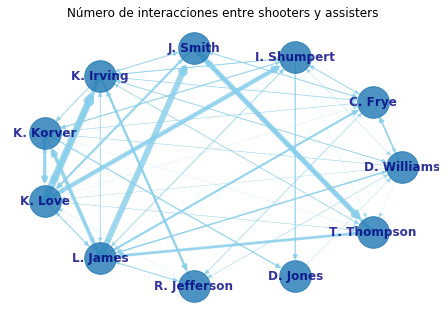

In [77]:
plt.clf() 
nx.draw_circular(G,node_size=1000,arrows=True,alpha = 0.8,
                 edge_color='skyblue', width=list(df_CLE_playoff['count']/5), edge_cmap=plt.cm.Blues, 
                 with_labels = True,font_size=12, font_color="navy", font_weight="bold")
plt.title("Número de interacciones entre shooters y assisters")

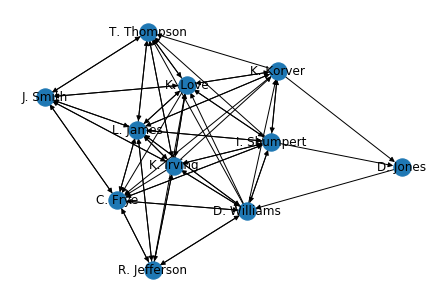

In [78]:
nx.draw_kamada_kawai(G,with_labels=True)

### Medidas de centralidad

In [79]:
degree = nx.degree_centrality(G)
in_degree = nx.in_degree_centrality(G)
out_degree = nx.out_degree_centrality(G)
closeness = nx.closeness_centrality(G)
betweeness = nx.betweenness_centrality(G)
eigen_cen = nx.eigenvector_centrality(G)
df_CLE_playoff_central = pd.DataFrame([degree,in_degree,out_degree,closeness,betweeness,eigen_cen]).transpose()
df_CLE_playoff_central.columns = ['degree','in_degree','out_degree','closeness','betweeness','eigen_cen']

In [80]:
df_CLE_playoff_central

,degree,in_degree,out_degree,closeness,betweeness,eigen_cen
C. Frye,1.3,0.8,0.5,0.833333,0.045044,0.361630
D. Jones,0.3,0.2,0.1,0.476190,0.002778,0.082827
D. Williams,1.6,0.7,0.9,0.714286,0.123951,0.296763
I. Shumpert,1.4,0.6,0.8,0.714286,0.070670,0.299672
J. Smith,1.0,0.5,0.5,0.625000,0.010000,0.266843
K. Irving,1.6,0.7,0.9,0.769231,0.071014,0.324622
K. Korver,1.1,0.5,0.6,0.666667,0.037478,0.252503
K. Love,1.5,0.8,0.7,0.833333,0.048792,0.357557
L. James,1.8,0.9,0.9,0.909091,0.095829,0.404726
R. Jefferson,0.9,0.4,0.5,0.625000,0.004444,0.208163


## Regular season
Veamos ahora si las tendencias anteriores se mantienen si filtramos los datos de los Cleveland Cavaliers para la temporada regular. Filtramos entonces los datos iniciales, y repetimos el análisis:

In [81]:
df_regular = data[data['GameType'] == 'regular']

In [82]:
df_regular

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,AwayScore,HomeTeam,HomePlay,HomeScore,Shooter,ShotType,ShotOutcome,ShotDist,Assister,Blocker,FoulType,Fouler,Fouled,Rebounder,ReboundType,ViolationPlayer,ViolationType,TimeoutTeam,FreeThrowShooter,FreeThrowOutcome,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
0,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,720,NYK,Jump ball: J. Noah vs. T. Thompson (D. Rose ga...,0,CLE,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J. Noah - NYK,T. Thompson - CLE,D. Rose
1,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,700,NYK,D. Rose makes 2-pt layup from 1 ft (assist by ...,2,CLE,NaN,0,D. Rose - NYK,2-pt layup,make,1.0,J. Noah - NYK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,686,NYK,NaN,2,CLE,K. Love misses 2-pt hook shot from 4 ft,0,K. Love - CLE,2-pt hook shot,miss,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,683,NYK,Defensive rebound by J. Noah,2,CLE,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J. Noah - NYK,defensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,676,NYK,C. Anthony misses 2-pt jump shot from 20 ft,2,CLE,NaN,0,C. Anthony - NYK,2-pt jump shot,miss,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,675,NYK,Offensive rebound by K. Porziis,2,CLE,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K. Porziis - NYK,offensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,675,NYK,K. Porziis makes 2-pt layup from 2 ft,4,CLE,NaN,0,K. Porziis - NYK,2-pt layup,make,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,659,NYK,NaN,4,CLE,L. James makes 2-pt jump shot from 11 ft (assi...,2,L. James - CLE,2-pt jump shot,make,11.0,K. Irving - CLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,658,NYK,Turnover by D. Rose (lost ball),4,CLE,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D. Rose - NYK,lost ball,NaN,NaN,NaN,NaN,NaN
9,/boxscores/201610250CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 25 2016,7:30 PM,CLE,1,646,NYK,NaN,4,CLE,K. Irving misses 3-pt jump shot from 25 ft,2,K. Irving - CLE,3-pt jump shot,miss,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Seleccionamos las columnas que nos interesan (`Shooter`y `Assister`), contando las apariciones de cada par:

In [83]:
df_sa_regular = df_regular.groupby(["Shooter","Assister", ]).size().reset_index().rename(columns={0:'count'})

Separamos en distintas columnas los nombres del shooter y el assister del equipo al que pertenecen:

In [84]:
df_sa_regular[['shooter','sh_team']]= df_sa_regular.Shooter.str.split(" - ",expand=True)
df_sa_regular[['assister','as_team']]= df_sa_regular.Assister.str.split(" - ",expand=True)

Y verificamos que las columnas de equipo resultantes sean iguales

In [85]:
comparacion_po = np.where(df_sa_regular["sh_team"] == df_sa_regular["as_team"], True, False)

In [86]:
np.unique(comparacion_po)

array([ True])

Con lo que podemos conservar sólo una de ellas:

In [87]:
df_sa_regular['team'] = df_sa_regular['sh_team']

In [88]:
df_sa_regular

,Shooter,Assister,count,shooter,sh_team,assister,as_team,team
0,. Abrines - OKC,A. Roberson - OKC,6,. Abrines,OKC,A. Roberson,OKC,OKC
1,. Abrines - OKC,C. Payne - OKC,3,. Abrines,OKC,C. Payne,OKC,OKC
2,. Abrines - OKC,D. McDermott - OKC,2,. Abrines,OKC,D. McDermott,OKC,OKC
3,. Abrines - OKC,D. Sabonis - OKC,8,. Abrines,OKC,D. Sabonis,OKC,OKC
4,. Abrines - OKC,E. Kanter - OKC,14,. Abrines,OKC,E. Kanter,OKC,OKC
5,. Abrines - OKC,J. Grant - OKC,6,. Abrines,OKC,J. Grant,OKC,OKC
6,. Abrines - OKC,J. Lauvergne - OKC,5,. Abrines,OKC,J. Lauvergne,OKC,OKC
7,. Abrines - OKC,K. Singler - OKC,2,. Abrines,OKC,K. Singler,OKC,OKC
8,. Abrines - OKC,N. Cole - OKC,1,. Abrines,OKC,N. Cole,OKC,OKC
9,. Abrines - OKC,R. Westbrook - OKC,42,. Abrines,OKC,R. Westbrook,OKC,OKC


Seleccionamos sólo las columnas a utilizar, esto es `shooter`, `assister`, `team` y `count`:

In [89]:
df_graph_regular = df_sa_regular[['shooter','assister','team','count']]
# df_graph.columns = [['shooter','assister','team','weight']]

In [90]:
df_graph_regular

,shooter,assister,team,count
0,. Abrines,A. Roberson,OKC,6
1,. Abrines,C. Payne,OKC,3
2,. Abrines,D. McDermott,OKC,2
3,. Abrines,D. Sabonis,OKC,8
4,. Abrines,E. Kanter,OKC,14
5,. Abrines,J. Grant,OKC,6
6,. Abrines,J. Lauvergne,OKC,5
7,. Abrines,K. Singler,OKC,2
8,. Abrines,N. Cole,OKC,1
9,. Abrines,R. Westbrook,OKC,42


Exploremos brevemente el data frame resultante.

In [91]:
df_graph_regular.shape

(5477, 4)

Resumen estadístico

In [92]:
df_graph_regular.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
count,5477.0,10.158481,16.93795,1.0,2.0,4.0,11.0,244.0


Tipo de datos:

In [93]:
df_graph_regular.dtypes

shooter     object
assister    object
team        object
count        int64
dtype: object

Comprobamos que no tenemos NA:

In [94]:
x = df_graph_regular.isnull().sum()
x

shooter     0
assister    0
team        0
count       0
dtype: int64

Número de observaciones únicas por variable:

In [95]:
df_graph_regular.nunique()

shooter     457
assister    458
team         30
count       118
dtype: int64

In [96]:
df_graph_regular['team'].unique()

array(['OKC', 'NOP', 'SAC', 'POR', 'LAC', 'DET', 'BRK', 'DAL', 'BOS',
       'IND', 'ORL', 'UTA', 'DEN', 'MEM', 'GSW', 'PHO', 'CHI', 'WAS',
       'MIN', 'PHI', 'HOU', 'TOR', 'SAS', 'LAL', 'NYK', 'CHO', 'CLE',
       'ATL', 'MIA', 'MIL'], dtype=object)

In [97]:
df_graph_regular

,shooter,assister,team,count
0,. Abrines,A. Roberson,OKC,6
1,. Abrines,C. Payne,OKC,3
2,. Abrines,D. McDermott,OKC,2
3,. Abrines,D. Sabonis,OKC,8
4,. Abrines,E. Kanter,OKC,14
5,. Abrines,J. Grant,OKC,6
6,. Abrines,J. Lauvergne,OKC,5
7,. Abrines,K. Singler,OKC,2
8,. Abrines,N. Cole,OKC,1
9,. Abrines,R. Westbrook,OKC,42


## Cleveland Cavaliers - playoffs
Filtramos los datos para Cleveland Cavaliers, que es el equipo que nos interesa analizar:


In [98]:
df_CLE_regular = df_graph_regular[df_graph_regular['team'] == 'CLE']

In [99]:
df_CLE_regular

,shooter,assister,team,count
685,C. Andersen,D. Liggins,CLE,1
686,C. Andersen,K. Felder,CLE,2
687,C. Andersen,M. Dunleavy,CLE,1
688,C. Andersen,R. Jefferson,CLE,1
756,C. Frye,D. Liggins,CLE,4
757,C. Frye,D. Williams,CLE,19
758,C. Frye,I. Shumpert,CLE,15
759,C. Frye,J. Jones,CLE,2
760,C. Frye,J. McRae,CLE,1
761,C. Frye,J. Smith,CLE,5


In [100]:
df_CLE_regular.nunique()

shooter     18
assister    18
team         1
count       34
dtype: int64

In [101]:
shooters = df_CLE_regular.shooter.unique()
shooters.sort()
shooters

array(['C. Andersen', 'C. Frye', 'D. Jones', 'D. Liggins', 'D. Williams',
       'E. Tavares', 'I. Shumpert', 'J. Jones', 'J. McRae', 'J. Smith',
       'K. Felder', 'K. Irving', 'K. Korver', 'K. Love', 'L. James',
       'M. Dunleavy', 'R. Jefferson', 'T. Thompson'], dtype=object)

In [102]:
assisters = df_CLE_regular.assister.unique()
assisters.sort()
assisters

array(['C. Andersen', 'C. Frye', 'D. Jones', 'D. Liggins', 'D. Williams',
       'E. Tavares', 'I. Shumpert', 'J. Jones', 'J. McRae', 'J. Smith',
       'K. Felder', 'K. Irving', 'K. Korver', 'K. Love', 'L. James',
       'M. Dunleavy', 'R. Jefferson', 'T. Thompson'], dtype=object)

In [103]:
players_regular = np.union1d(shooters,assisters)

In [104]:
len(players_regular)

18

In [105]:
if len(shooters) == len(assisters):
    (shooters==assisters).all()

In [106]:
G = nx.Graph()
# G.clear()

In [107]:
G = nx.from_pandas_edgelist(df_CLE_regular,source='assister',target='shooter',edge_attr='count',create_using=nx.DiGraph())
#nx.DiGraph()

Observemos que la gráfica tiene un nodo por cada jugador, y una arista para cada par de ellos que interactúan en una jugada de tiro:

In [108]:
G.number_of_nodes()

18

In [109]:
G.number_of_edges()

190

### Visualización

Text(0.5, 1.0, 'Número de interacciones entre shooters y assisters')

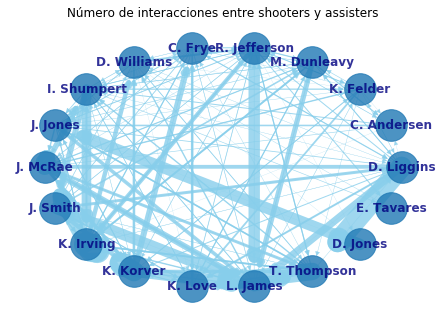

In [110]:
plt.clf() 
nx.draw_circular(G,node_size=1000,arrows=True,alpha = 0.8,
                 edge_color='skyblue', width=list(df_CLE_regular['count']/5), edge_cmap=plt.cm.Blues, 
                 with_labels = True,font_size=12, font_color="navy", font_weight="bold")
plt.title("Número de interacciones entre shooters y assisters")

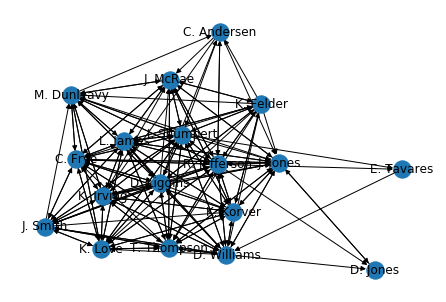

In [111]:
nx.draw_kamada_kawai(G,with_labels=True)

### Medidas de centralidad

In [112]:
degree = nx.degree_centrality(G)
in_degree = nx.in_degree_centrality(G)
out_degree = nx.out_degree_centrality(G)
closeness = nx.closeness_centrality(G)
betweeness = nx.betweenness_centrality(G)
eigen_cen = nx.eigenvector_centrality(G)
df_CLE_regular_central = pd.DataFrame([degree,in_degree,out_degree,closeness,betweeness,eigen_cen]).transpose()
df_CLE_regular_central.columns = ['degree','in_degree','out_degree','closeness','betweeness','eigen_cen']

In [113]:
df_CLE_regular_central

,degree,in_degree,out_degree,closeness,betweeness,eigen_cen
C. Andersen,0.529412,0.235294,0.294118,0.531250,0.000306,0.073249
C. Frye,1.529412,0.823529,0.705882,0.850000,0.016980,0.296755
D. Jones,0.235294,0.176471,0.058824,0.548387,0.000000,0.071272
D. Liggins,1.470588,0.588235,0.882353,0.680000,0.024934,0.210714
D. Williams,1.529412,0.764706,0.764706,0.772727,0.077886,0.265509
E. Tavares,0.176471,0.117647,0.058824,0.515152,0.000000,0.049537
I. Shumpert,1.705882,0.823529,0.882353,0.809524,0.051344,0.281222
J. Jones,1.352941,0.823529,0.529412,0.850000,0.081772,0.271819
J. McRae,1.235294,0.705882,0.529412,0.739130,0.013958,0.245473
J. Smith,1.176471,0.529412,0.647059,0.653846,0.002438,0.207003


## LeBron James
Analizaremos todos los tiros que hizo LeBron James en los playoffs en la temporada 2016-2017.

In [128]:
import seaborn as sns
import json
from nba_api.stats.endpoints import shotchartdetail

Lebron James tiene el ID 2544, esto lo obtuvimos desde la pagina de la NBA.

In [129]:
response = shotchartdetail.ShotChartDetail(
    team_id=0,
    player_id=2544,
    season_nullable='2016-17',
    season_type_all_star='Playoffs'
)

content = json.loads(response.get_json())

In [130]:
# transform contents into dataframe
results = content['resultSets'][0]
headers = results['headers']
rows = results['rowSet']
df = pd.DataFrame(rows)
df.columns = headers

In [131]:
shot_df = df
shot_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0041600111,113,2544,LeBron James,1610612739,Cleveland Cavaliers,1,1,40,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-7,-6,1,1,20170415,CLE,IND
1,Shot Chart Detail,0041600111,141,2544,LeBron James,1610612739,Cleveland Cavaliers,2,10,48,Made Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-2,-1,1,1,20170415,CLE,IND
2,Shot Chart Detail,0041600111,159,2544,LeBron James,1610612739,Cleveland Cavaliers,2,9,14,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,3,1,1,20170415,CLE,IND
3,Shot Chart Detail,0041600111,190,2544,LeBron James,1610612739,Cleveland Cavaliers,2,6,30,Made Shot,Alley Oop Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,1,1,1,20170415,CLE,IND
4,Shot Chart Detail,0041600111,280,2544,LeBron James,1610612739,Cleveland Cavaliers,2,0,1,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-7,-1,1,1,20170415,CLE,IND
5,Shot Chart Detail,0041600111,290,2544,LeBron James,1610612739,Cleveland Cavaliers,3,11,16,Made Shot,Turnaround Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,7,-50,61,1,1,20170415,CLE,IND
6,Shot Chart Detail,0041600111,296,2544,LeBron James,1610612739,Cleveland Cavaliers,3,10,50,Made Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,23,-235,-6,1,1,20170415,CLE,IND
7,Shot Chart Detail,0041600111,318,2544,LeBron James,1610612739,Cleveland Cavaliers,3,7,3,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-173,190,1,1,20170415,CLE,IND
8,Shot Chart Detail,0041600111,375,2544,LeBron James,1610612739,Cleveland Cavaliers,3,3,12,Made Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-7,-5,1,1,20170415,CLE,IND
9,Shot Chart Detail,0041600111,383,2544,LeBron James,1610612739,Cleveland Cavaliers,3,2,11,Made Shot,Running Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-16,-6,1,1,20170415,CLE,IND


Graficaremos los tiros

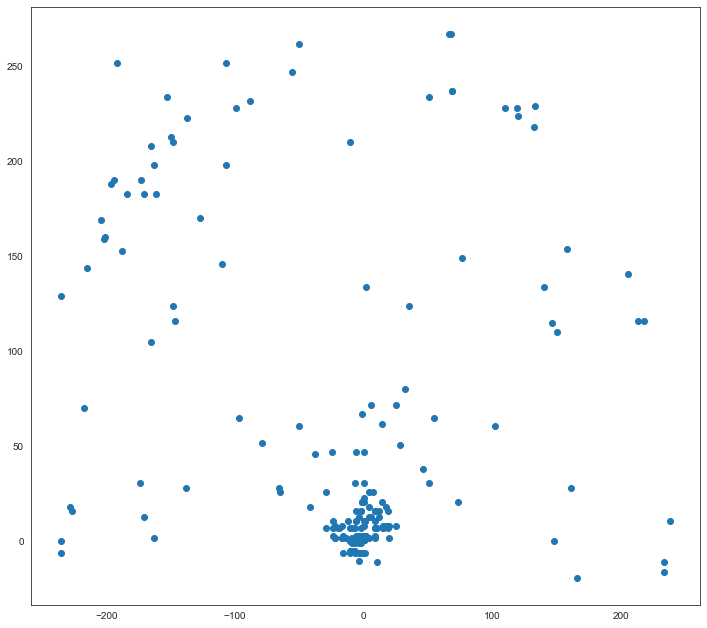

In [132]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(shot_df['LOC_X'], shot_df['LOC_Y'])
plt.show()

In [133]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

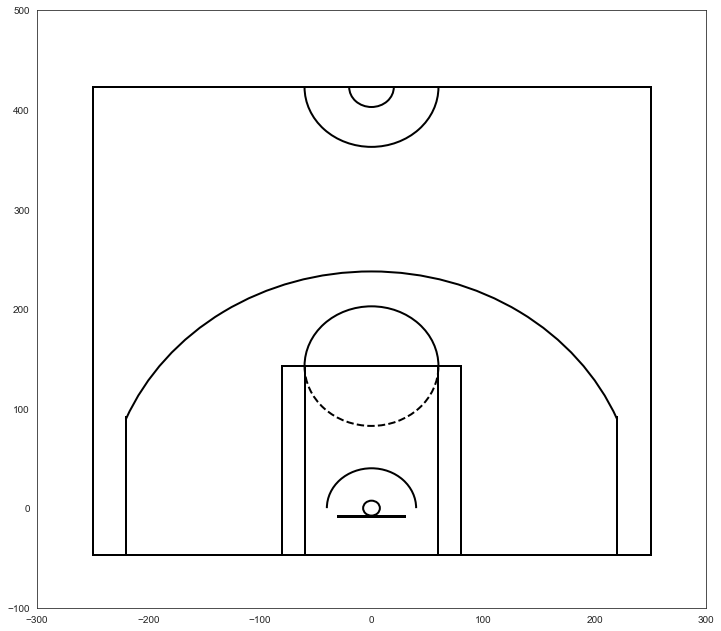

In [134]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

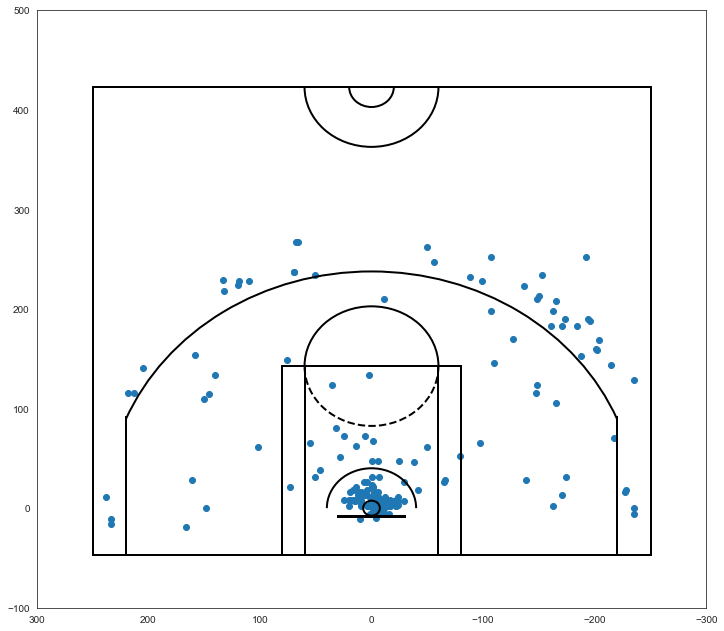

In [135]:
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.ylim(-100,500)
plt.show()

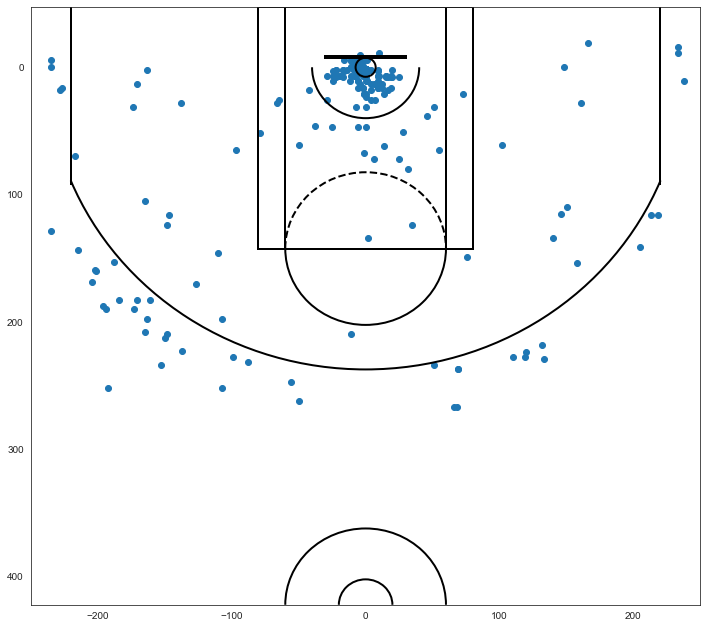

In [136]:
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
draw_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)
# get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

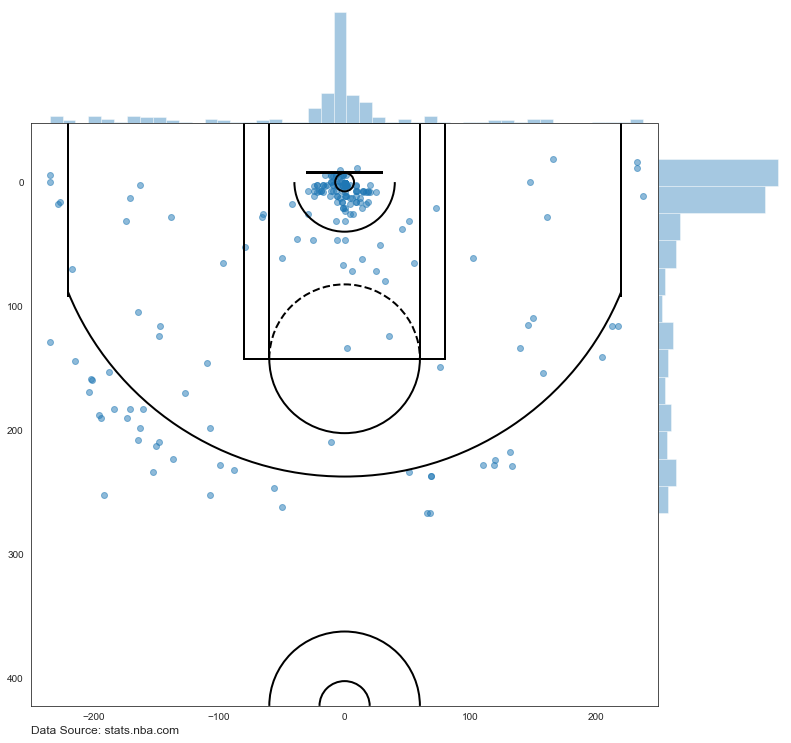

In [137]:
# create our jointplot
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='scatter', space=0, alpha=0.5)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('James Harden FGA \n2014-15 Reg. Season', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
ax.text(-250,445,'Data Source: stats.nba.com',
        fontsize=12)

plt.show()

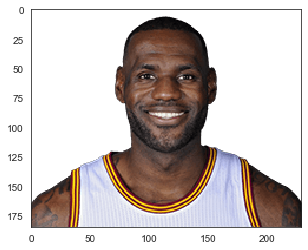

In [138]:
import urllib.request
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
# we pass in the link to the image as the 1st argument
# the 2nd argument tells urlretrieve what we want to scrape
pic = urllib.request.urlretrieve("http://stats.nba.com/media/players/230x185/2544.png",
                                "2544.png")

# urlretrieve returns a tuple with our image as the first 
# element and imread reads in the image as a 
# mutlidimensional numpy array so matplotlib can plot it
harden_pic = plt.imread(pic[0])

# plot the image
plt.imshow(harden_pic)
plt.show()

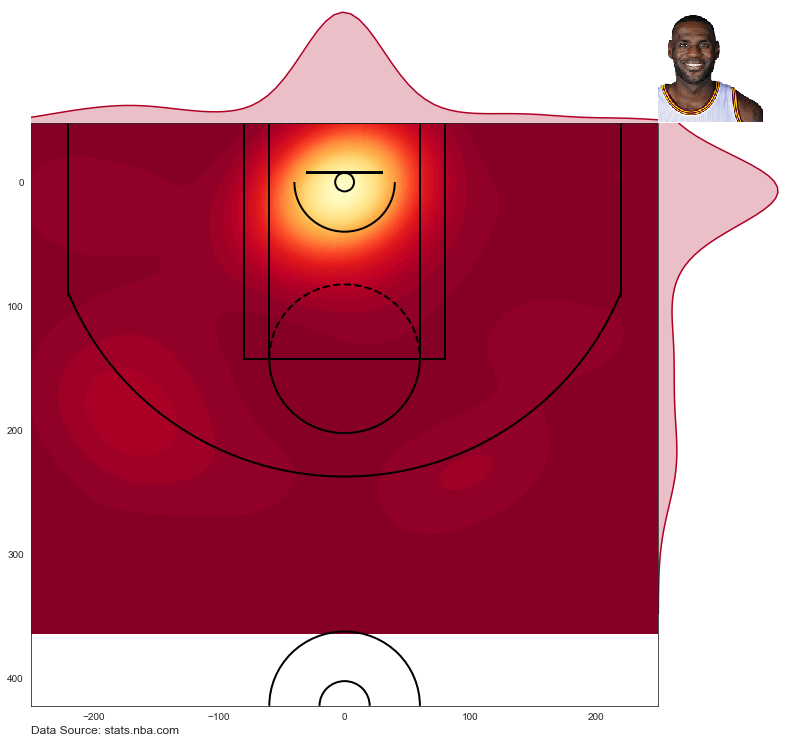

In [139]:
from matplotlib.offsetbox import  OffsetImage

# create our jointplot

# get our colormap for the main kde plot
# Note we can extract a color from cmap to use for 
# the plots that lie on the side and top axes
cmap=plt.cm.YlOrRd_r 

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('James Harden FGA \n2014-15 Reg. Season', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
ax.text(-250,445,'Data Source: stats.nba.com',
        fontsize=12)

# Add Harden's image to the top right
# First create our OffSetImage by passing in our image
# and set the zoom level to make the image small enough 
# to fit on our plot
img = OffsetImage(harden_pic, zoom=0.6)
# Pass in a tuple of x,y coordinates to set_offset
# to place the plot where you want, I just played around
# with the values until I found a spot where I wanted
# the image to be
img.set_offset((625,621))
# add the image
ax.add_artist(img)

plt.show()

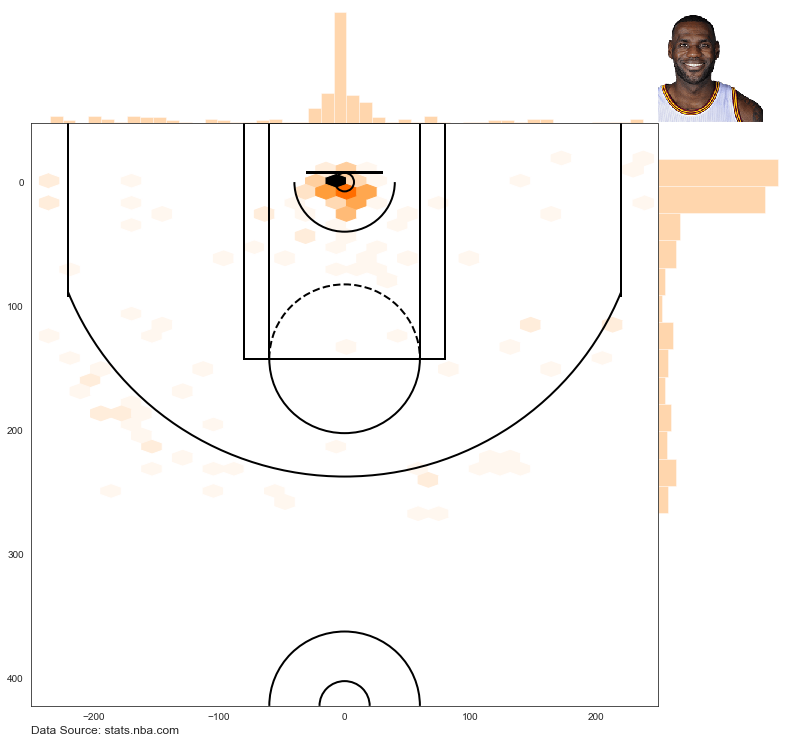

In [140]:
# create our jointplot

cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='hex', space=0, color=cmap(.2), cmap=cmap)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto 
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('FGA 2014-15 Reg. Season', y=1.2, fontsize=14)

# Add Data Source and Author
ax.text(-250,445,'Data Source: stats.nba.com', fontsize=12)

# Add James Harden's image to the top right
img = OffsetImage(harden_pic, zoom=0.6)
img.set_offset((625,621))
ax.add_artist(img)

plt.show()

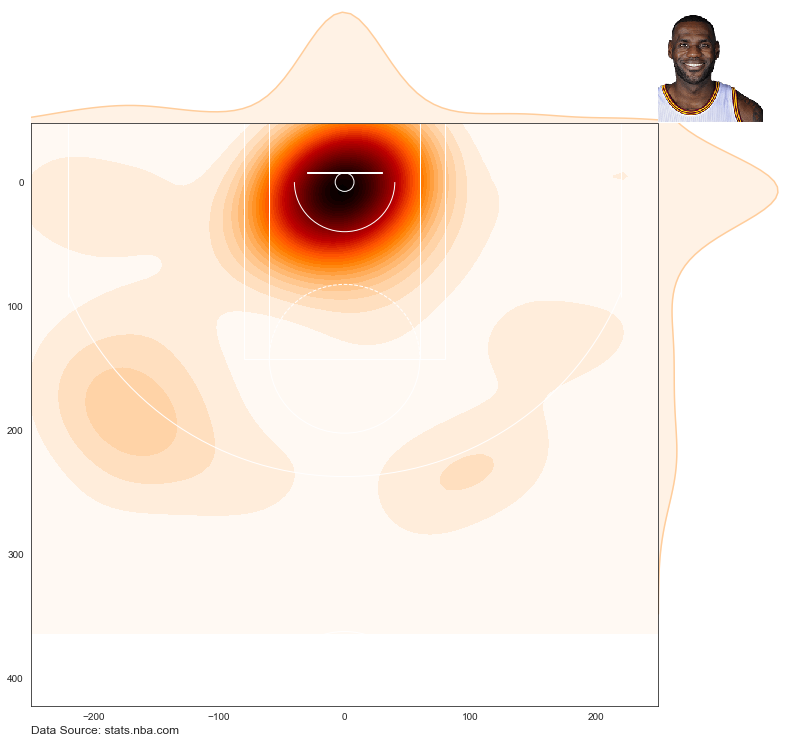

In [141]:
# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint, 
# It's the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax, color="white", lw=1)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('James Harden FGA \n2014-15 Reg. Season', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
ax.text(-250,445,'Data Source: stats.nba.com', fontsize=12)

# Add Harden's image to the top right
# First create our OffSetImage by passing in our image
# and set the zoom level to make the image small enough 
# to fit on our plot
img = OffsetImage(harden_pic, zoom=0.6)
# Pass in a tuple of x,y coordinates to set_offset
# to place the plot where you want, I just played around
# with the values until I found a spot where I wanted
# the image to be
img.set_offset((625,621))
# add the image
ax.add_artist(img)

plt.show()